Importieren der notwendigen Bibliotheken:

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Laden der Daten aus der .csv Datei:

In [112]:
df = pd.read_csv('bottle_data.csv')

# Zeilen mit 0-Werten entfernen
df = df[~(df == 0).any(axis=1)]


Zum anzeigen der Daten:

In [113]:
df.head()

,bottle,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green,temperature_green,temperature_red,temperature_blue,final_weight
4,49634160,13.690837,327.070365,-14.635909,800.000000,-13.080841,787.980070,29.48444,29.796289,29.501809,2.577217
5,49634162,6.791456,325.893987,188.251228,787.756086,-11.493370,787.894203,29.48444,29.796289,29.501809,22.394287
6,49634164,6.586750,324.941422,180.324304,776.018464,-12.131216,787.845898,29.48444,29.796289,29.501809,21.262253
7,49634166,9.765664,323.636608,195.000991,763.200688,-20.903621,788.104724,29.48444,29.796289,29.501809,22.424231
8,49634168,12.650856,322.286783,181.140691,752.064811,-15.498375,788.336118,29.48444,29.796289,29.501809,21.376976


Datenvisualiserung:

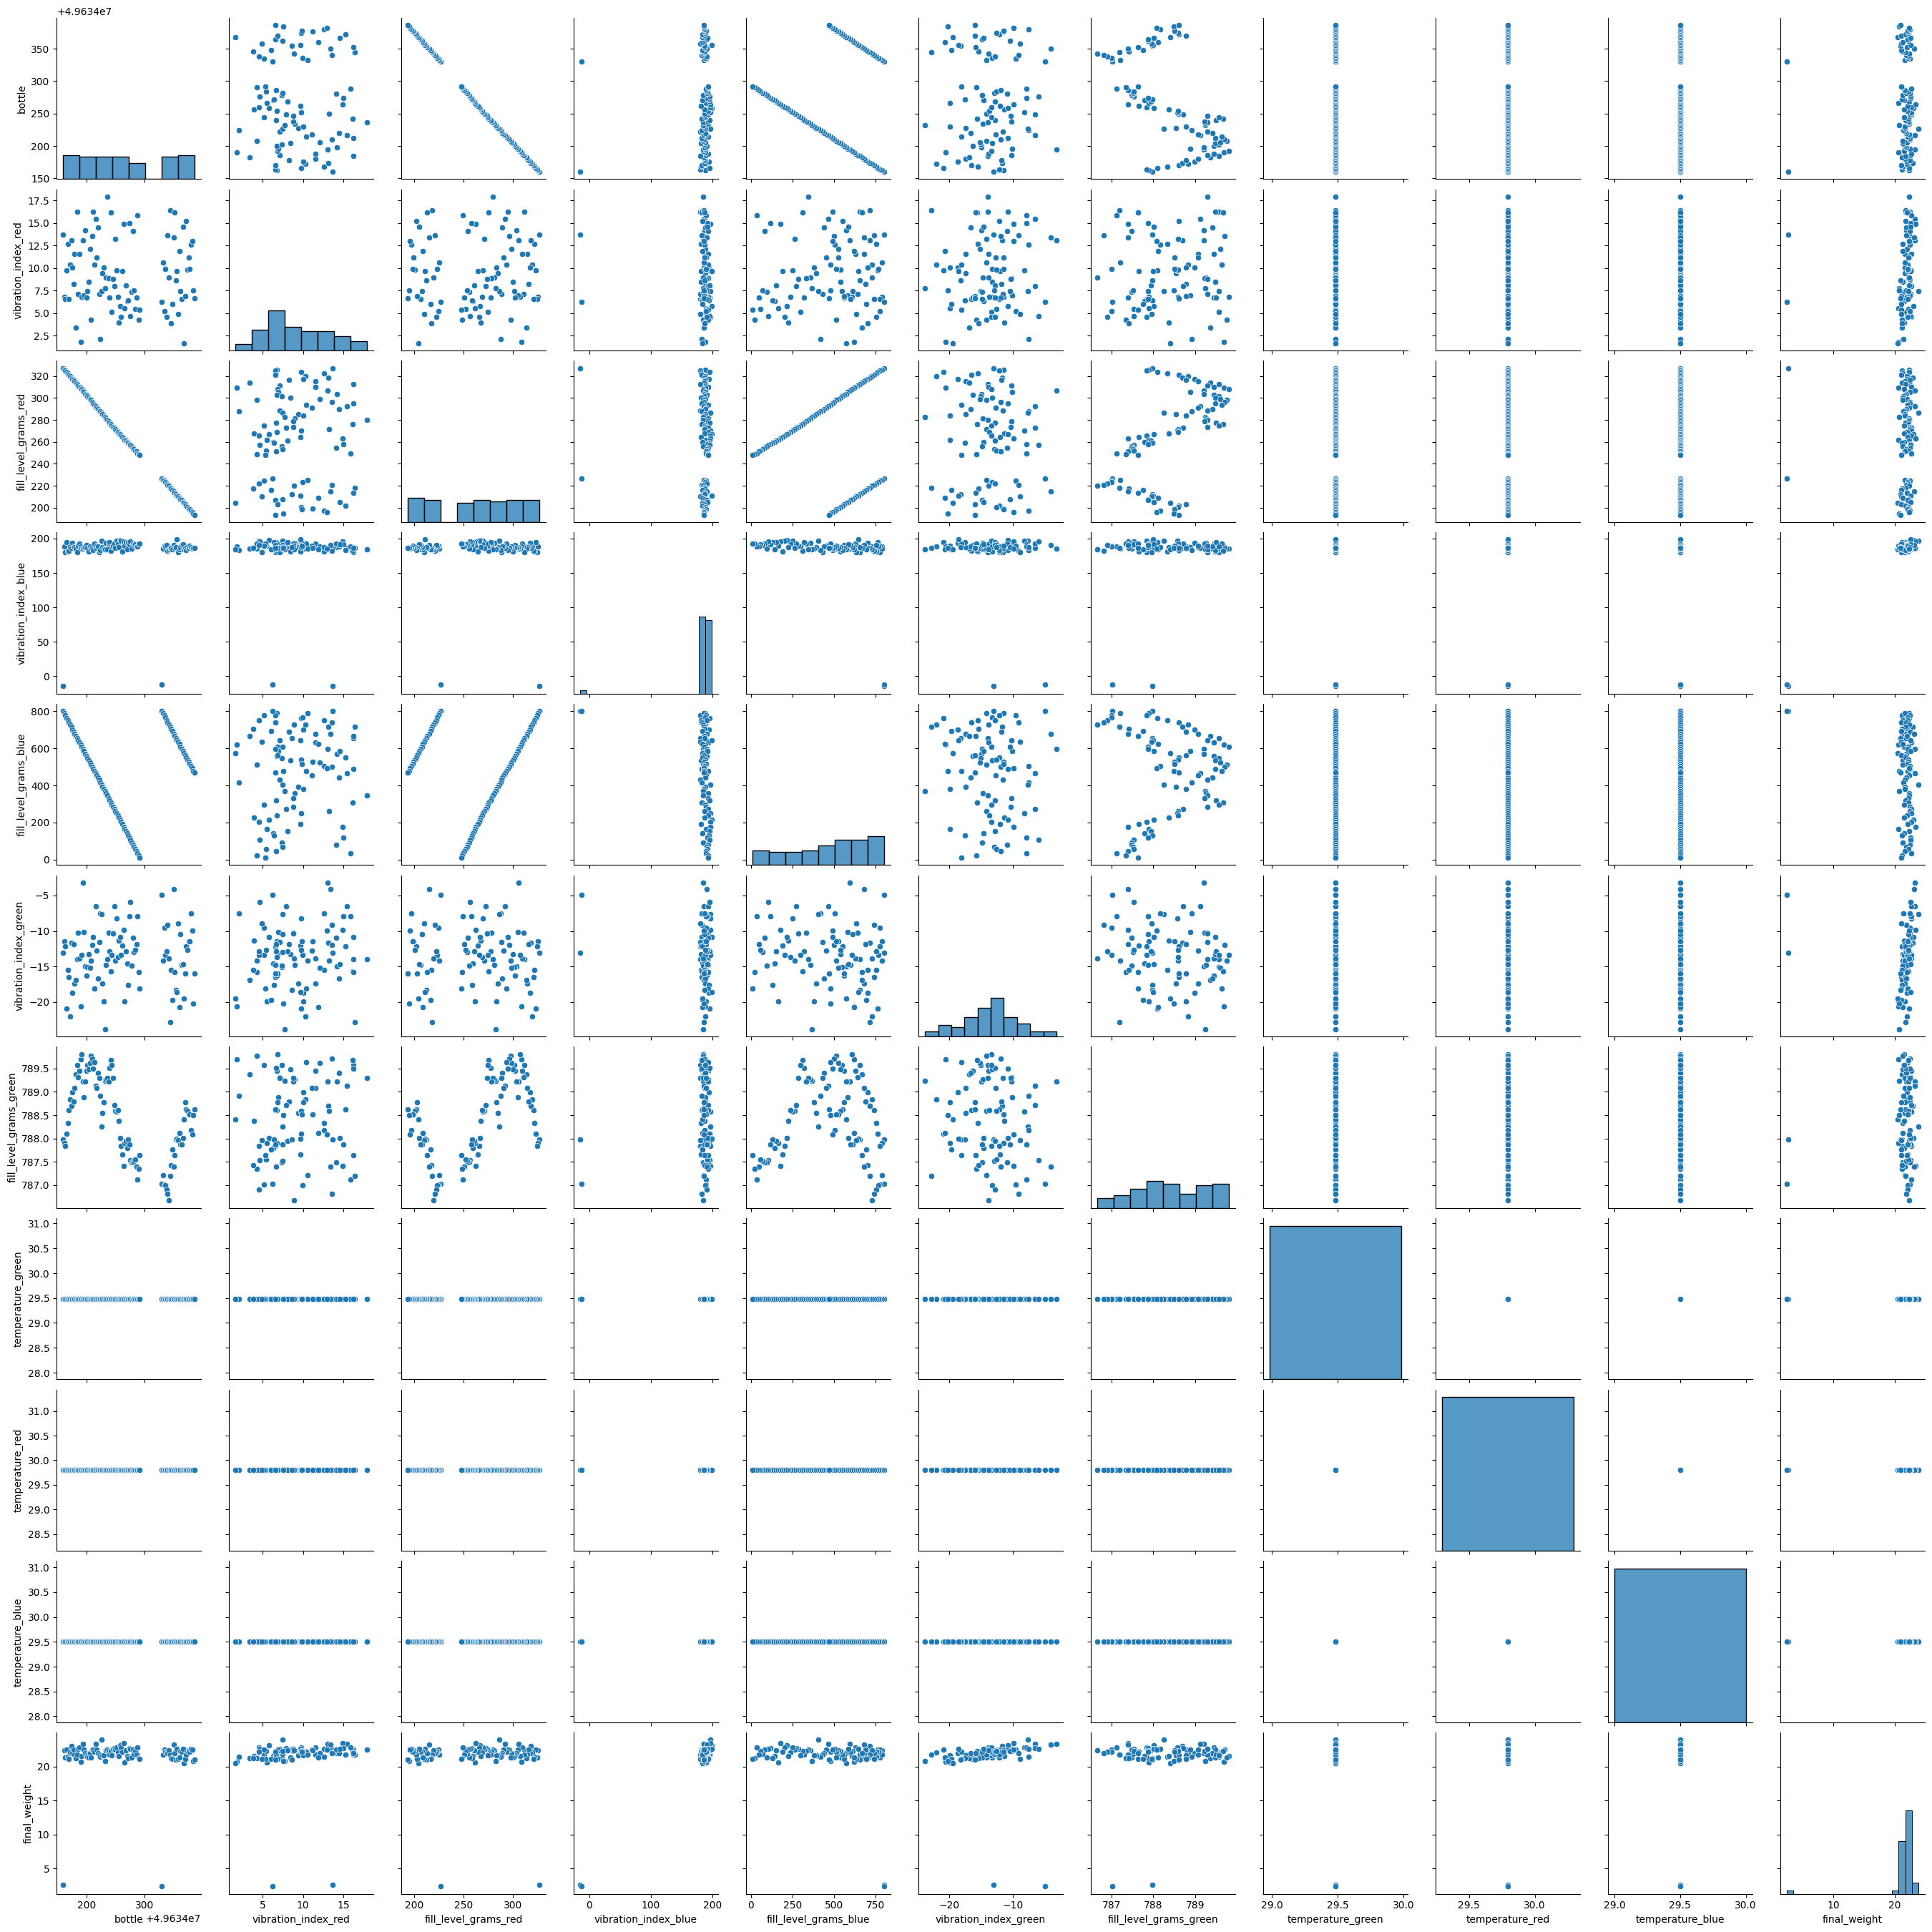

In [114]:
sns.pairplot(df)

Aufteilen der Daten:

In [115]:
y = df['final_weight']
X = df.drop(['bottle','final_weight','temperature_green','temperature_red','temperature_blue'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green
44,6.684694,277.547735,194.905259,320.130617,-12.842478,789.504682
89,6.230259,226.754620,-12.649585,800.000000,-4.951659,787.030557
19,1.743207,308.969477,188.491826,618.061451,-20.574717,789.690203
90,10.575261,225.436533,185.539569,788.336713,-14.221916,787.211775
110,15.239874,201.778830,183.301719,550.530676,-12.156927,788.615364


Trainieren des Modells:

In [116]:
model_linear = LinearRegression()

model_linear.fit(X_train, y_train)

print("linear:")
print(model_linear.coef_)


model_random_forest = model_random_forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

scores = cross_val_score(model_random_forest, X, y, cv=5, scoring='neg_mean_squared_error')
model_random_forest.fit(X_train, y_train)

print("Random Forest:")
print(model_random_forest.get_params())


linear:
[ 0.08936234  0.00240508  0.10002018  0.00056773  0.0837675  -0.02656935]
Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [117]:
y_pred_linear = model_linear.predict(X_train)

y_pred_rf = model_random_forest.predict(X_train)

Evaluieren des Modells auf den Trainingsdaten:

In [118]:
print("MSE(Trainingsdaten_linear):", mean_squared_error(y_train, y_pred_linear))
print("MSE(Trainingsdaten_random_forest):", mean_squared_error(y_train, y_pred_rf))

MSE(Trainingsdaten_linear): 0.08389447198144932
MSE(Trainingsdaten_random_forest): 3.646231083541396


Evaluieren des Modells auf den Testdaten:

In [119]:
y_pred_linear = model_linear.predict(X_test)
#print(y_pred_linear)
print("MSE(Testdaten_linear):", mean_squared_error(y_test, y_pred_linear))
print("RMSE(Testdaten_linear):", root_mean_squared_error(y_test, y_pred_linear))

y_pred_rf = model_random_forest.predict(X_test)
#print(y_pred_rf)
print("MSE(Testdaten_random_forest):", mean_squared_error(y_test, y_pred_rf))
print("RMSE(Testdaten_random_forest):", root_mean_squared_error(y_test, y_pred_rf))
#print(y_test)


MSE(Testdaten_linear): 0.12030048914117919
RMSE(Testdaten_linear): 0.3468436090533876
MSE(Testdaten_random_forest): 15.248454720663792
RMSE(Testdaten_random_forest): 3.904926980196146


Tabelle, welche die genuzten Spalten (X) für die Vorhersage (y) enthält und den MSE-Wert für die jeweiligen Spalten:

| Genutzte Spalten         | Modell-Typ      | MSE-Wert (Training) | MSE-Wert (Test) |
|--------------------------|-----------------|---------------------|-----------------|
|vibration_index_red, fill_level_grams_red, vibration_index_blue, fill_level_grams_blue, vibration_index_green, fill_level_grams_green                 | Linear          | 0.083                 | 0.12             |
| vibration_index_red, fill_level_grams_red, vibration_index_blue, fill_level_grams_blue, vibration_index_green, fill_level_grams_green                      | random forest           | 3.65               | 15.24             |

Prognase für X.csv Datenset:

In [120]:

df2 = pd.read_csv('Testset_X.csv')
df2_X = df2.drop(['bottle','temperature_green','temperature_red','temperature_blue'], axis=1)

y_pred2 = model_linear.predict(df2_X)

result = pd.DataFrame({'Flaschen ID': df2['bottle'], 'y_hat': y_pred2})

Generierung eine .csv:

In [121]:
result.to_csv('reg_52315881-62201247-52315863.csv', index=False)